In [1]:
from sklearn.externals import joblib
x_train, x_test, y_train, y_test = joblib.load('dataset.pkl')

In [2]:
clf = joblib.load('svm_model.pkl')

In [3]:
expected, predicted = y_test, clf.predict(x_test)

from sklearn.metrics import classification_report
report = classification_report(expected, predicted)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.97553191489361701

In [5]:
clf.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [6]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
import pandas as pd
dataframe = pd.DataFrame(clf.cv_results_)
dataframe.to_csv('svm_cross_validation.csv')

with open('svm_precision_recall.csv', 'w') as output:
    output.write(report)

In [8]:
import numpy as np

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf.best_estimator_, x_train + x_test, y_train + y_test, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

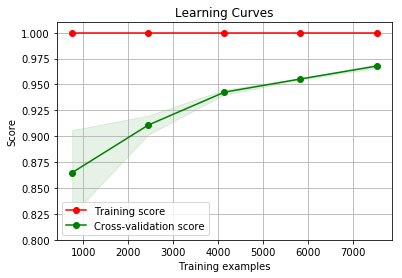

In [10]:
from learning_curve import plot_learning_curve
plot_learning_curve('Learning Curves', train_sizes, train_scores, test_scores, ylim=(0.80, 1.01))